### Loading clean data

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt; plt.rcdefaults()


In [3]:
data = pd.read_csv('dat6.csv')

In [4]:
data.columns

Index(['Unnamed: 0', 'application', 'battery', 'id', 'session', 'duration_s',
       'app_name', 'startTime', 'startTimeMillis', 'endTime', 'endTimeMillis',
       'date', 'newid', 'ids'],
      dtype='object')

In [8]:
del data['Unnamed: 0']

In [9]:
del data['id']

In [10]:
del data['battery']

In [107]:
app_list = list(data.app_name.unique())

In [109]:
# extract first two digit of start hour
data['startH'] = data.startTime.str[11:13]

### Hour in day
Function with input is app name

In [121]:
def most_hour(app):
    df_app = data.loc[data['app_name']==app,['ids', 'startH']]   
    return df_app.groupby(['startH']).count()

def graphbar(app):
    df = most_hour(app)  
    df[app] = df.loc[:, 'ids']
    df = pd.DataFrame(df.loc[:,app])
    df.plot.bar()


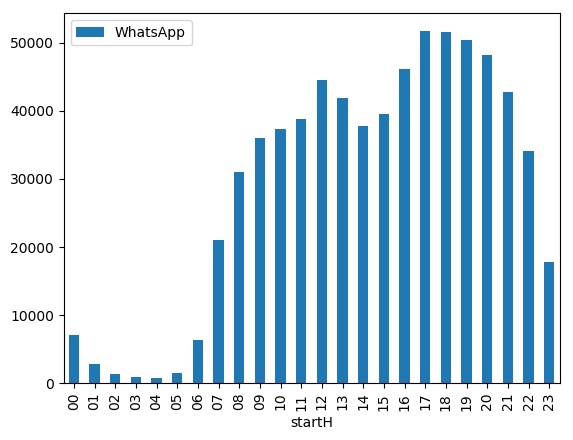

In [123]:
graphbar('WhatsApp')

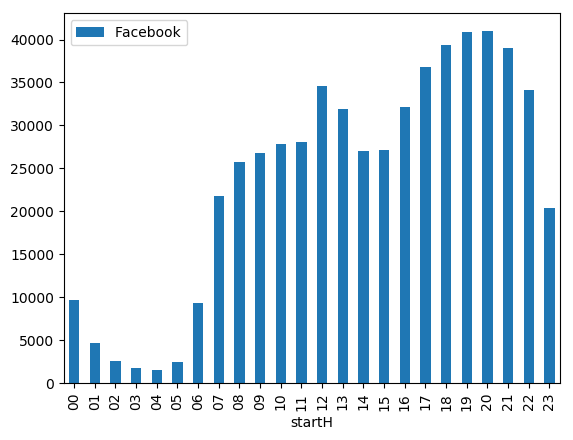

In [122]:
graphbar('Facebook')

In [124]:
list_pop_app =[ 'WhatsApp', 'Facebook', 'Google', 'Messenger', 'Email', 
    'Instagram', 'Snapchat', 'Photos', 'YouTube', 'Browser']

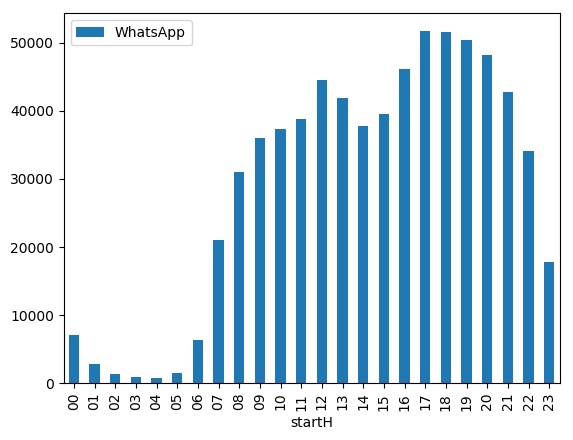

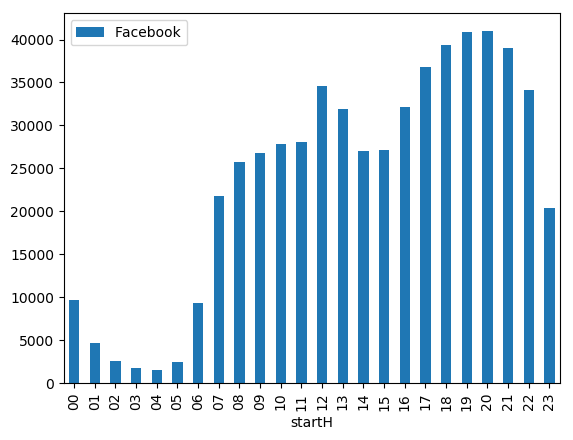

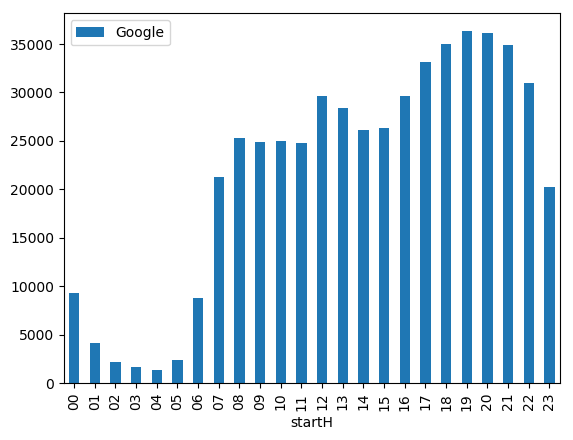

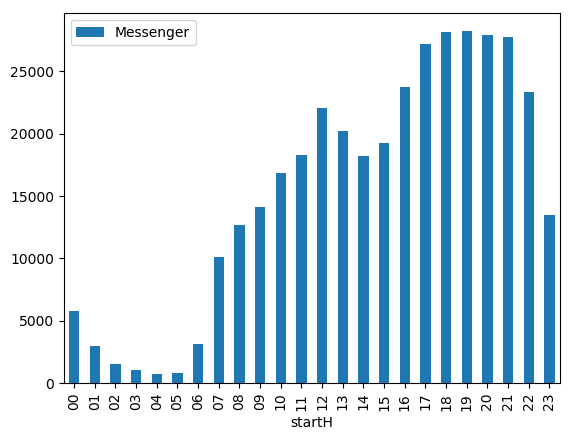

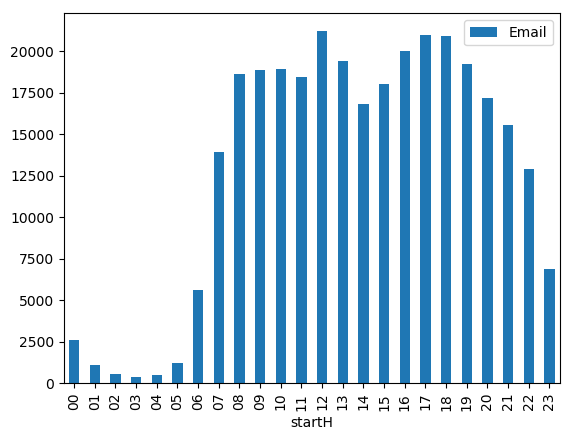

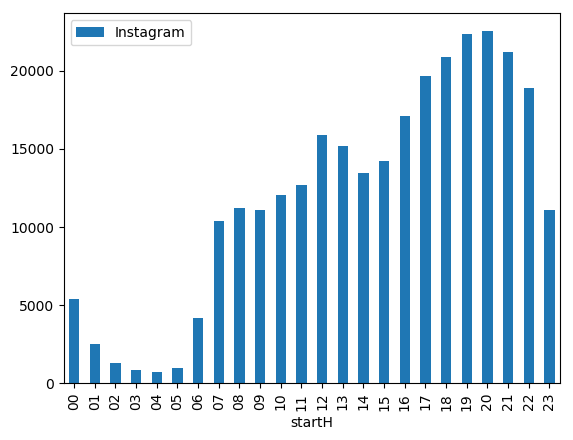

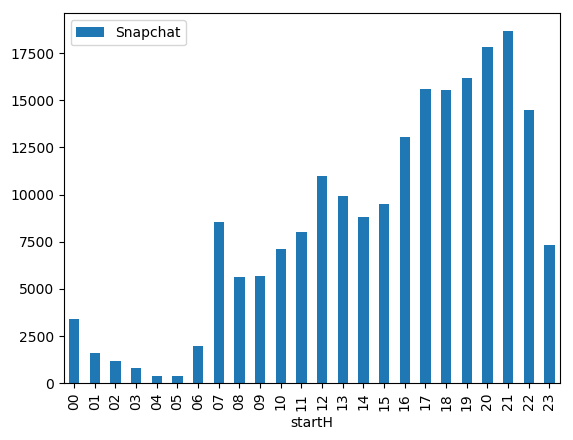

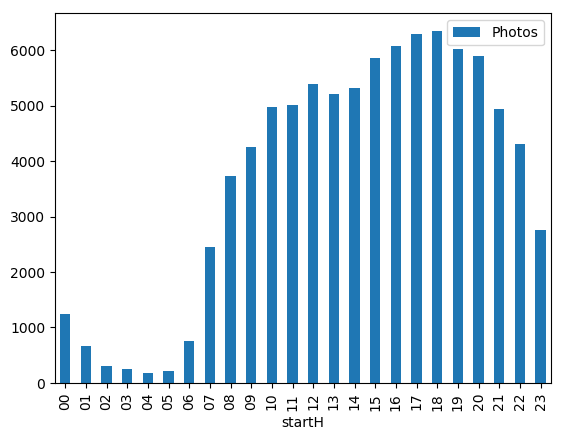

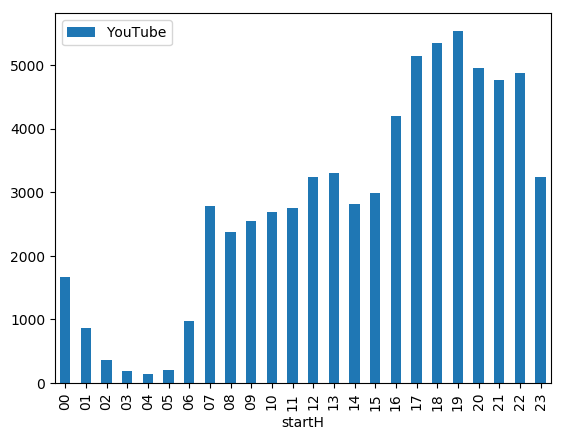

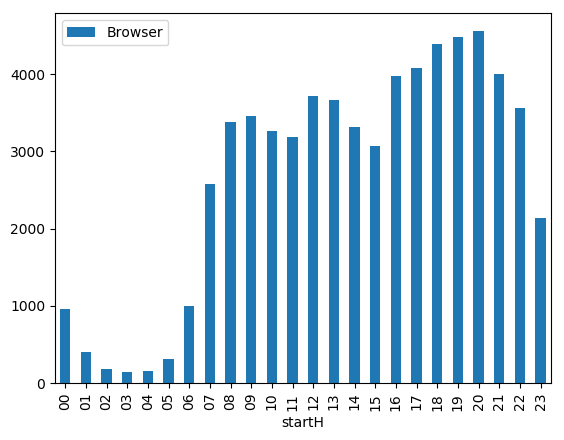

In [125]:
for app in list_pop_app:
    graphbar(app)

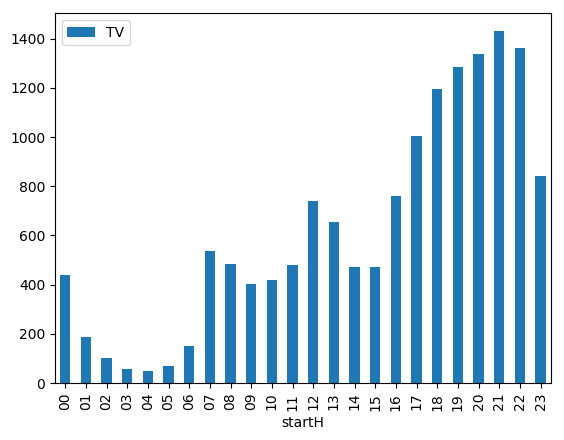

In [126]:
graphbar('TV')

### Day in week
Monday ... Sunday

In [127]:
data['day'] = (data['date']+2)%7

In [133]:
day_dic = {0: 'Mon', 1:'Tue', 2:'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6:'Sun'}

In [134]:
daydate = []
for day in data.day:
    daydate.append(day_dic[day])

In [135]:
data['dateday'] = daydate

In [137]:
dataday = data.groupby('dateday')['duration_s'].sum()

In [140]:
dataday_df = pd.DataFrame(dataday)

In [142]:
dataday_df['duration_h']= round(dataday_df['duration_s']/3600/3,2)

In [144]:
del dataday_df['duration_s']

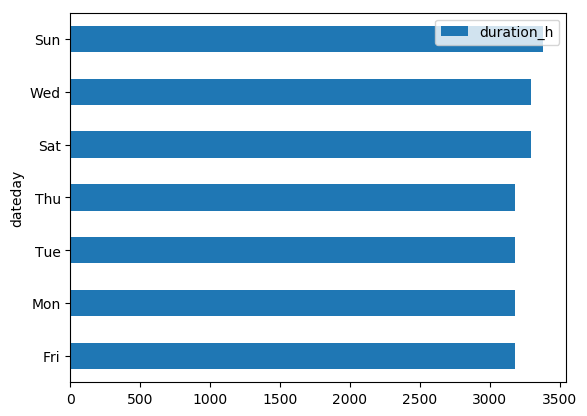

In [170]:
dataday_df.sort_values('duration_h').plot.barh()

Function for app (record)

In [177]:
def day(app):
    df = data.loc[data['app_name']==app,['dateday', 'ids']]
    dat = df.groupby(['dateday']).count()
    dat['records'] = dat['ids']/3 #3 weeks
    del dat['ids']
    dat.sort_values('records').plot.barh()
 
    

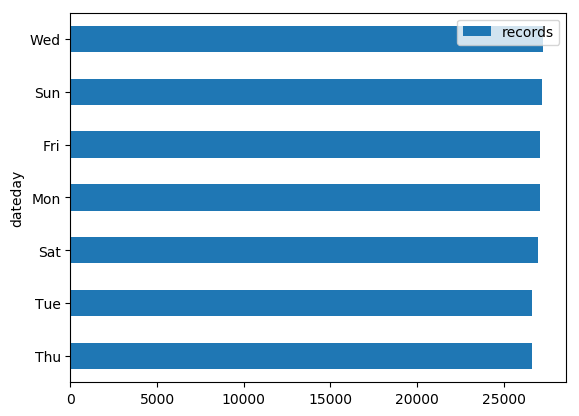

In [178]:
day('Facebook')

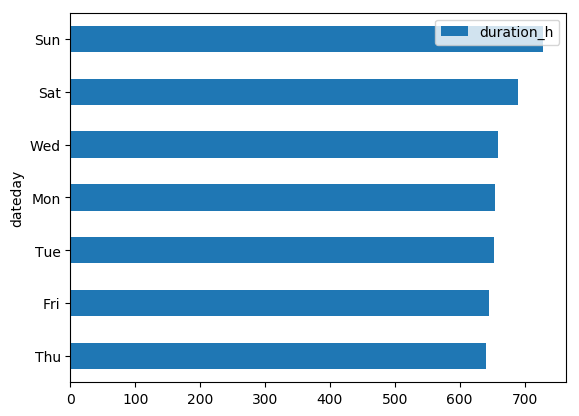

In [184]:
dayh('Facebook')

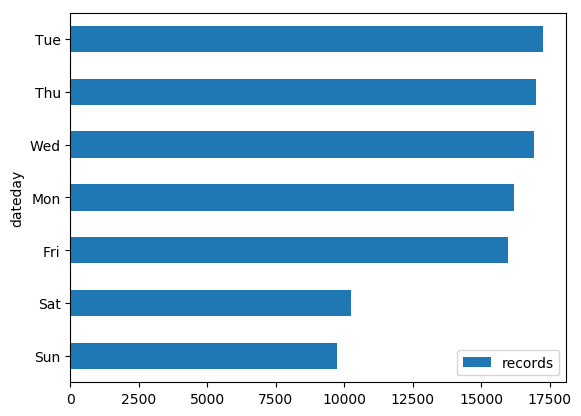

In [179]:
day('Email')

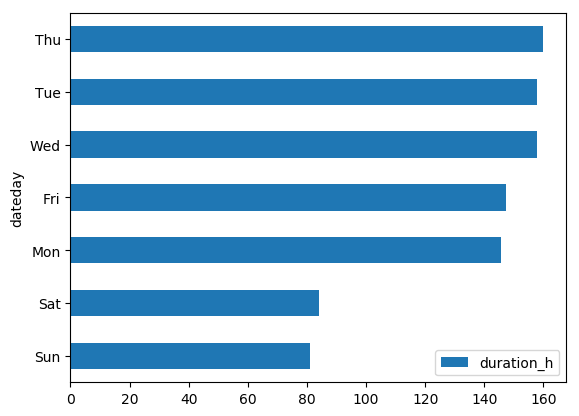

In [185]:
dayh('Email')

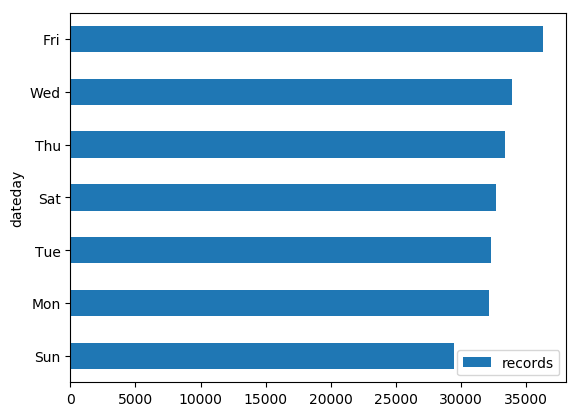

In [180]:
day('WhatsApp')

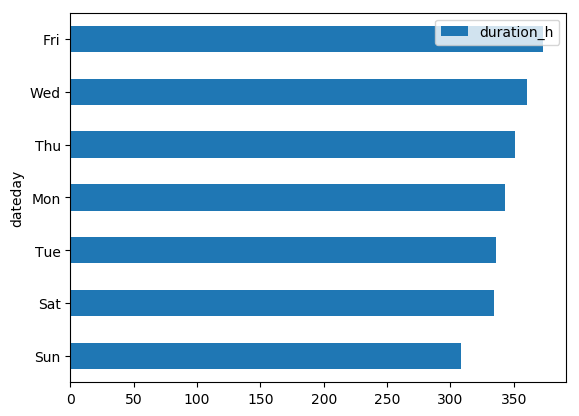

In [186]:
dayh('WhatsApp')

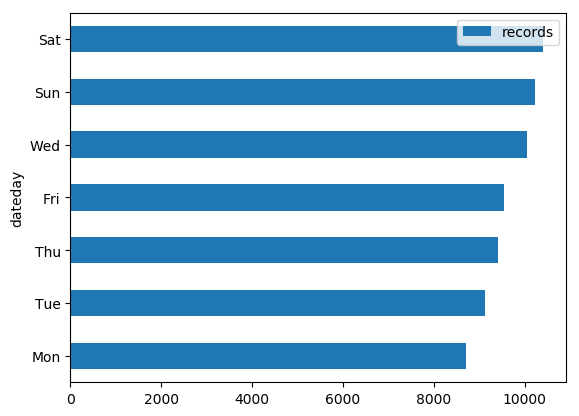

In [181]:
day('Snapchat')

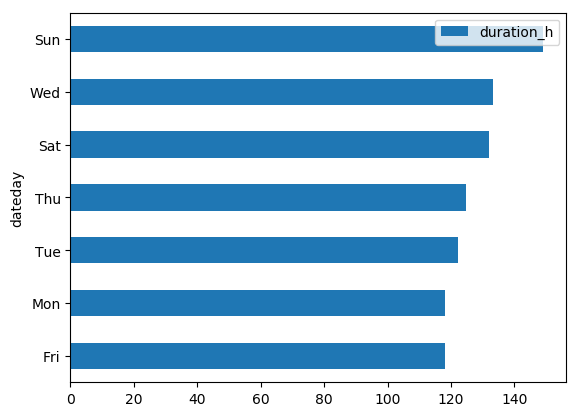

In [187]:
dayh('Snapchat')

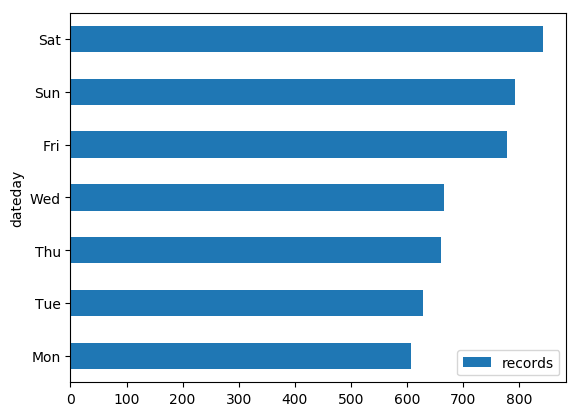

In [182]:
day('TV')

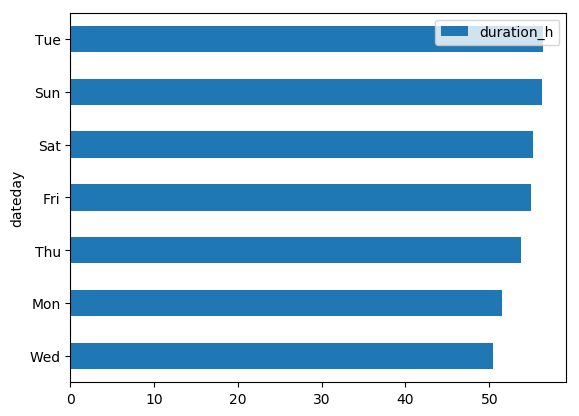

In [188]:
dayh('TV')

function app with duration in hours

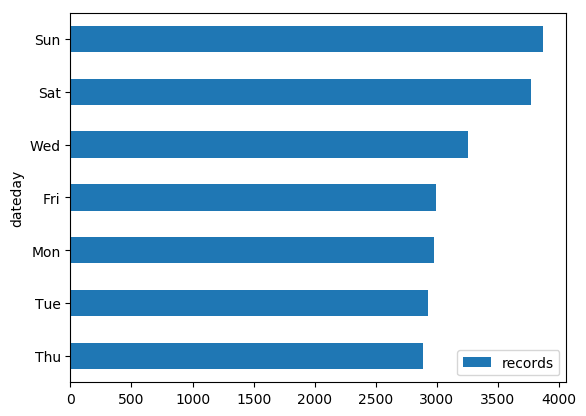

In [189]:
day('YouTube')

In [183]:
def dayh(app):
    df = data.loc[data['app_name']==app,['dateday', 'duration_s']]
    dat = df.groupby(['dateday']).sum()
    dat['duration_h'] =  dat['duration_s']/3600/3
    del dat['duration_s']
    dat.sort_values('duration_h').plot.barh()

In [190]:
# focus on frequency (number of records other than duration)

data.loc[data['day']<=4, 'day_of_week'] = 'weekday'
data.loc[data['day']>4, 'day_of_week'] = 'weekend'

In [216]:
avg_record_wd, avg_record_wk = [], []

for app in app_list:
    
    df = data.loc[data['app_name']== app,['day_of_week', 'ids']]
    dat = df.groupby(['day_of_week']).count()
    dat['records'] = dat['ids']/3 #3 weeks
    if len(dat)==2:
        wd = round(dat.iloc[0,1] / 5 , 2)
        wk = round(dat.iloc[1,1] / 2 , 2)

        avg_record_wd.append(wd)
        avg_record_wk.append(wk)
    elif len(dat) == 1:
       
        # this case there is only few records in weekday, nothing in weekend
        wd = round(dat.iloc[0,1] / 5 , 2)
        avg_record_wd.append(wd)         
        avg_record_wk.append(0) 

In [220]:
avg_df = pd.DataFrame({'app_name': app_list, 'weekday': avg_record_wd, 'weekend': avg_record_wk} )

In [222]:
avg_df = avg_df.sort_values('weekday')

In [226]:
avg_df = avg_df.set_index('app_name')

In [227]:
avg_df.tail(10)

,weekday,weekend
app_name,,
Twitter,3032.40,2830.83
Browser,3038.67,3065.83
Photos,3975.93,4796.50
Snapchat,9370.07,10319.17
Instagram,13322.07,14321.00
Email,16673.33,9977.67
Messenger,17820.47,16694.67
Google,23961.33,26357.00
Facebook,26938.67,27081.67


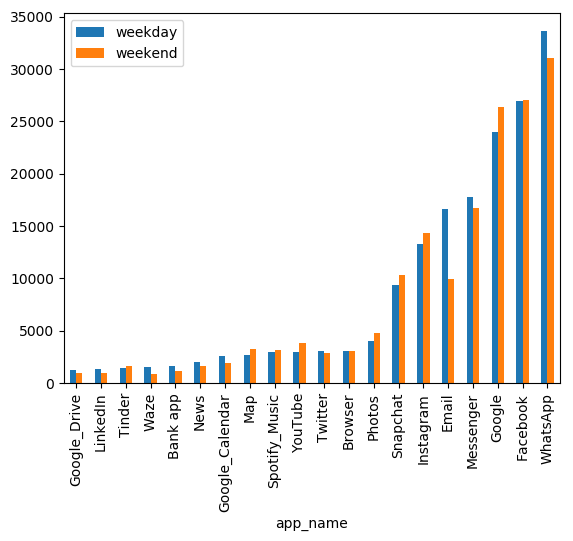

In [234]:
avg_df.tail(20).plot.bar()

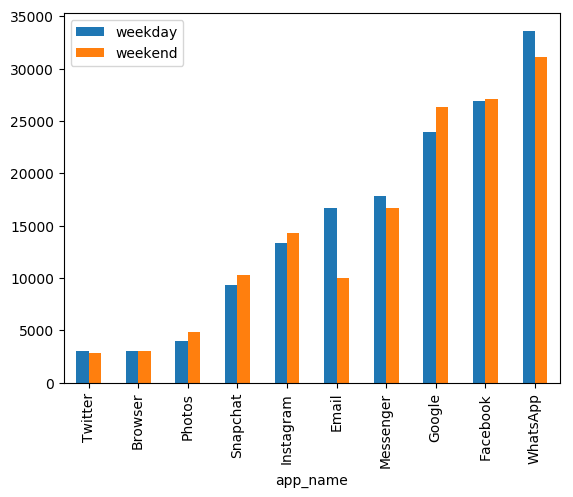

In [231]:
avg_df.tail(10).plot.bar()

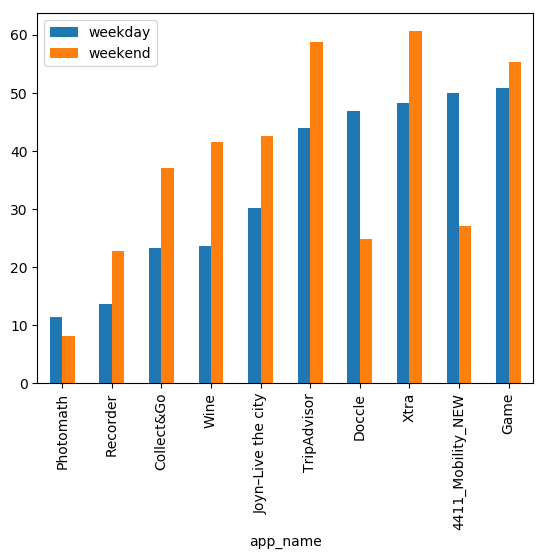

In [232]:
avg_df[10:20].plot.bar()

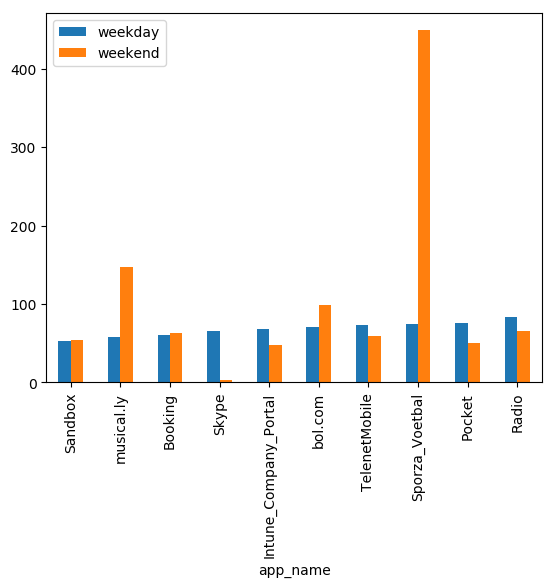

In [233]:
avg_df[20:30].plot.bar()

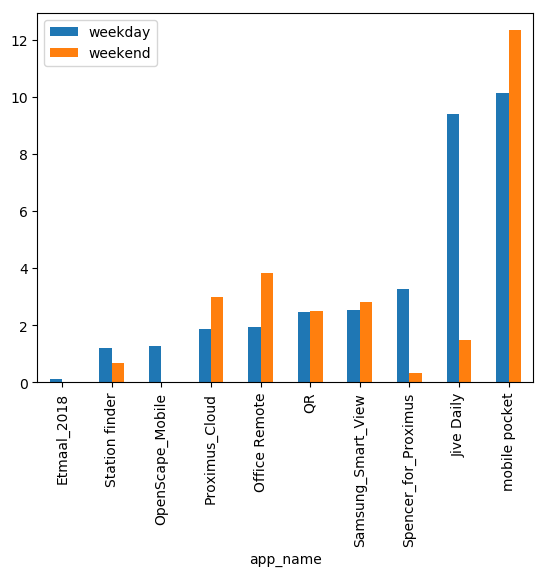

In [229]:
avg_df.head(10).plot.bar()